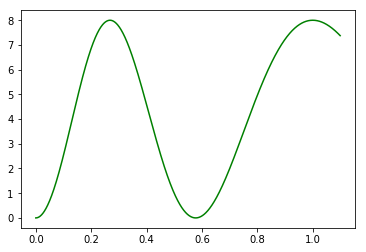

[1.0798270435165377e-30 0.0002879963520213441 0.0011519416333659956
 0.002591704527559245 0.004607066199419713 0.007197720333468354
 0.006566977111464669 0.004657918832981733 0.0030769909489956095
 0.0018234781897895713 0.0008966387665708703 0.00029570460014359014
 1.9881550915389248e-05 6.834965019727207e-05 0.00044026333275555584
 0.0011347516705752657 0.002150918607794659 0.003487843196771413
 0.005144579835239405 0.0071201585045179445]
[0.    0.001 0.002 0.003 0.004 0.005 0.571 0.572 0.573 0.574 0.575 0.576
 0.577 0.578 0.579 0.58  0.581 0.582 0.583 0.584]


[array([1.0798270435165377e-30, 0.0002879963520213441,
        0.0011519416333659956, 0.002591704527559245, 0.004607066199419713,
        0.007197720333468354, 0.006566977111464669, 0.004657918832981733,
        0.0030769909489956095, 0.0018234781897895713,
        0.0008966387665708703, 0.00029570460014359014,
        1.9881550915389248e-05, 6.834965019727207e-05,
        0.00044026333275555584, 0.0011347516705752657,
        0.002150918607794659, 0.003487843196771413, 0.005144579835239405,
        0.0071201585045179445], dtype=object),
 array([0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.571, 0.572, 0.573,
        0.574, 0.575, 0.576, 0.577, 0.578, 0.579, 0.58 , 0.581, 0.582,
        0.583, 0.584])]

In [4]:
from pylab import *
import math
import numpy as np
import matplotlib.pyplot as plt

# tolerance
epsilon = 0.000001

# range of gamma values to sample
# the range can be extended beyond gamma=1 
delta = 0.001
gamma_range = np.arange(0,1.1,delta)

def gamma_periodic(n, wedge_angle):
    
    periodic_gamma = []
    min_error = []
    error = np.array([None]*len(gamma_range))
    
    for i in range(len(gamma_range)):
        gamma =gamma_range[i]
        T_gamma = np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])
        theta = math.pi-wedge_angle
        identity = np.array([[1,0,0],
                           [0,1,0],
                           [0,0,1]])
        state = identity
        #run the simulation for this particular gamma
        col_count = 0
        while col_count < n:
            state = new_state(state,theta,gamma)
            theta = -theta;
            col_count += 1   
            
        error[i] =  find_error(state)
        
    # plot error (residual sum of squares) w.r.t to gamma 
    plt.plot(gamma_range, error, 'g-')
    plt.show()
    
    temp_index  = sorted(np.argpartition(error, 20)[:20])
    print(error[temp_index])
    print(gamma_range[temp_index])
    min_error = np.append(min_error, error[temp_index])
    periodic_gamma = np.append(periodic_gamma, gamma_range[temp_index])        

            
    return [min_error, periodic_gamma]


def rotation(theta):
    return np.array([[1,0,0],
                        [0,cos(theta), -sin(theta)],
                        [0,sin(theta), cos(theta)]])
def reflection(gamma):
    return np.array([[-(1-gamma**2)/(1+gamma**2), -2*gamma/(1+gamma**2),0],
                                    [-2*gamma/(1+gamma**2),(1-gamma**2)/(1+gamma**2),0],
                                   [0,0,-1]])

def new_state(current_state, theta, gamma):
    T_gamma = reflection(gamma)
    R_theta = rotation(theta)
    return np.matmul(np.matmul(R_theta, T_gamma), current_state) 
            
        

def find_error(x):
    error = 0 
    for i in range(3):
        for j in range(3):
            if i == j: 
                error += (x[i][j]-1)**2 
            else:
                error += x[i][j]**2
    return error

# for i in range(4,20,2):
#     print(i)
#     ans = gamma_periodic(i, 3*math.pi/12)
    
gamma_periodic(6,1/24*math.pi)
    



In [3]:
#persistently periodic orbits with wedge when angle = pi/12
#found a 4 period orbit with wedge angle pi/12 and gamma 0.9828
#found a 6 period orbit with wedge angle pi/12 and gamma 0.557329
#found a 8 period orbit with wedge angle pi/12 and gamma 0.3894
#found a 10 period orbit with wedge angle pi/12 and gamma 0.2945, 0.708402
#found a 12 period orbit with wedge angle pi/12 and gamma 0.2314
#found a 14 period orbit with wedge angle pi/12 and gamma 0.1849, 0.4592, 0.779802


#persistently periodic pentagon with gamma = 0.6180, period (found 6, 8, 10, 14, 18, 20, 30, and 40 depends on initial conditions
#found this gamma by looking at wedge angle = 3*pi/5, couldn't find any other gamma so far

#found isosceles triangle with main angle 3*pi/5 is periodic with different periods for gamma= 0.6180